# L3: Image generation app 🎨

Load your HF API key and relevant Python libraries

In [37]:
import os
import io
import IPython.display
from PIL import Image
import base64 
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
hf_api_key = os.environ['HF_API_KEY']

In [38]:
# Helper function
import requests, json

#Text-to-image endpoint
def get_completion(inputs, parameters=None, ENDPOINT_URL=os.environ['HF_API_TTI_BASE']):
    headers = {
      "Authorization": f"Bearer {hf_api_key}",
      "Content-Type": "application/json"
    }   
    data = { "inputs": inputs }
    if parameters is not None:
        data.update({"parameters": parameters})
    response = requests.request("POST",
                                ENDPOINT_URL,
                                headers=headers,
                                data=json.dumps(data))
    return json.loads(response.content.decode("utf-8"))

In [39]:
"""
import os, requests

url = os.environ["HF_API_TTI_BASE"]
headers = {
  "Authorization": f"Bearer {os.environ['HF_API_TOKEN']}",
  "Accept": "image/png",
  "Content-Type": "application/json",
}
payload = {"inputs": "a watercolor painting of a greyhound, soft pastel tones"}
r = requests.post(url, headers=headers, json=payload, timeout=120)
r.raise_for_status()
with open("out.png", "wb") as f:
    f.write(r.content)
"""

'\nimport os, requests\n\nurl = os.environ["HF_API_TTI_BASE"]\nheaders = {\n  "Authorization": f"Bearer {os.environ[\'HF_API_TOKEN\']}",\n  "Accept": "image/png",\n  "Content-Type": "application/json",\n}\npayload = {"inputs": "a watercolor painting of a greyhound, soft pastel tones"}\nr = requests.post(url, headers=headers, json=payload, timeout=120)\nr.raise_for_status()\nwith open("out.png", "wb") as f:\n    f.write(r.content)\n'

## Local TTI with Diffusers (MPS on Apple Silicon)

### Minimal SDXL-Turbo demo (very fast, good for drafts)

In [6]:
from diffusers import AutoPipelineForText2Image
import torch

device = "mps" if torch.backends.mps.is_available() else "cpu"

pipe = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/sdxl-turbo",
    torch_dtype=torch.float16 if device == "mps" else torch.float32,
    variant="fp16" if device == "mps" else None,
)
pipe = pipe.to(device)

prompt = "a watercolor painting of a greyhound, soft pastel tones"
# SDXL-Turbo is trained for very low steps; 1-4 steps recommended
image = pipe(prompt, num_inference_steps=2, guidance_scale=0.0).images[0]
image.save("out.png")
print("wrote out.png")


model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/5.14G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/2 [00:00<?, ?it/s]

wrote out.png


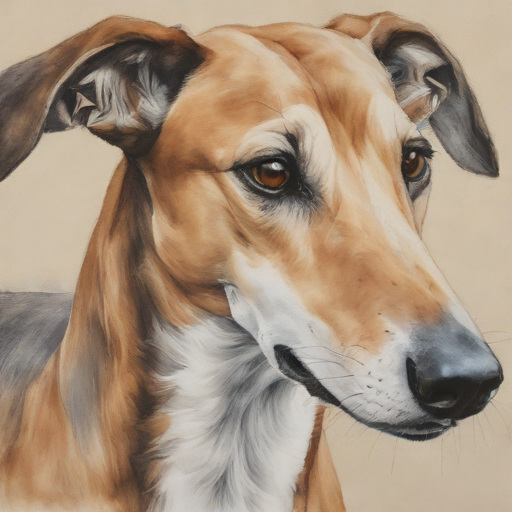

In [7]:
from IPython.display import display, Image as IPyImage
display(IPyImage(filename="out.png"))  # shows inline


### Higher quality (slower) option — SD 1.5

In [8]:
from diffusers import StableDiffusionPipeline
import torch
device = "mps" if torch.backends.mps.is_available() else "cpu"

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if device == "mps" else torch.float32,
    safety_checker=None,  # optional
)
pipe = pipe.to(device)
pipe.enable_attention_slicing()  # helps memory on MPS

img = pipe("a watercolor greyhound, pastel tones", num_inference_steps=25, guidance_scale=7.5).images[0]
img.save("out_sd15.png")


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/25 [00:00<?, ?it/s]

/Users/ytchen/Documents/experimental/GenAIGradio/.venv/lib/python3.11/site-packages/diffusers/image_processor.py:148: RuntimeWarning: invalid value encountered in cast
  images = (images * 255).round().astype("uint8")


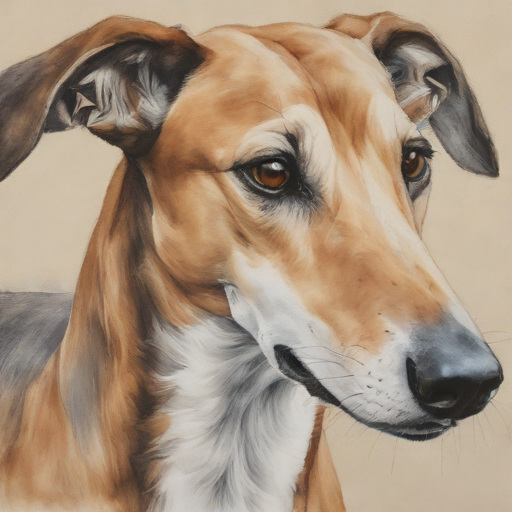

In [10]:
display(IPyImage(filename="out.png"))  # shows inline


## Building an image generation app 

Here we are going to run `runwayml/stable-diffusion-v1-5` using the `🧨 diffusers` library.

In [9]:
"""
prompt = "a dog in a park"

result = get_completion(prompt)
IPython.display.HTML(f'<img src="data:image/png;base64,{result}" />')
"""

'\nprompt = "a dog in a park"\n\nresult = get_completion(prompt)\nIPython.display.HTML(f\'<img src="data:image/png;base64,{result}" />\')\n'

## Generating with `gr.Interface()`

In [14]:
from PIL import Image
from io import BytesIO
import base64, os, requests
from typing import Any

def ensure_pil(x: Any) -> Image.Image:
    # Already a PIL image
    if isinstance(x, Image.Image):
        return x

    # Raw bytes/bytearray
    if isinstance(x, (bytes, bytearray)):
        return Image.open(BytesIO(x)).convert("RGB")

    # String: URL, data URL, local path, or raw base64
    if isinstance(x, str):
        s = x.strip()
        if s.startswith(("http://", "https://")):
            r = requests.get(s, timeout=30)
            r.raise_for_status()
            return Image.open(BytesIO(r.content)).convert("RGB")
        if s.startswith("data:image"):
            b64 = s.split(",", 1)[1]
            return Image.open(BytesIO(base64.b64decode(b64))).convert("RGB")
        if os.path.exists(s):
            return Image.open(s).convert("RGB")
        # assume raw base64
        return Image.open(BytesIO(base64.b64decode(s))).convert("RGB")

    # Hugging Face response shapes:
    if isinstance(x, dict):
        if "generated_image" in x and isinstance(x["generated_image"], str):
            return ensure_pil(x["generated_image"])
        if "images" in x and isinstance(x["images"], list) and x["images"]:
            return ensure_pil(x["images"][0])

    if isinstance(x, list) and x and isinstance(x[0], dict) and "image" in x[0]:
        return ensure_pil(x[0]["image"])

    raise TypeError(f"Don't know how to convert type {type(x)} to PIL.Image")


In [26]:
"""
import gradio as gr 

#A helper function to convert the PIL image to base64
#so you can send it to the API
def base64_to_pil(img_base64):
    base64_decoded = base64.b64decode(img_base64)
    byte_stream = io.BytesIO(base64_decoded)
    pil_image = Image.open(byte_stream)
    return pil_image

def generate(prompt):
    output = get_completion(prompt)
    result_image = base64_to_pil(output)
    return result_image

gr.close_all()
demo = gr.Interface(fn=generate,
                    inputs=[gr.Textbox(label="Your prompt")],
                    outputs=[gr.Image(label="Result")],
                    title="Image Generation with Stable Diffusion",
                    description="Generate any image with Stable Diffusion",
                    allow_flagging="never",
                    examples=["the spirit of a tamagotchi wandering in the city of Vienna","a mecha robot in a favela"])

demo.launch(share=True, server_port=int(os.environ['PORT1']))
"""

'\nimport gradio as gr \n\n#A helper function to convert the PIL image to base64\n#so you can send it to the API\ndef base64_to_pil(img_base64):\n    base64_decoded = base64.b64decode(img_base64)\n    byte_stream = io.BytesIO(base64_decoded)\n    pil_image = Image.open(byte_stream)\n    return pil_image\n\ndef generate(prompt):\n    output = get_completion(prompt)\n    result_image = base64_to_pil(output)\n    return result_image\n\ngr.close_all()\ndemo = gr.Interface(fn=generate,\n                    inputs=[gr.Textbox(label="Your prompt")],\n                    outputs=[gr.Image(label="Result")],\n                    title="Image Generation with Stable Diffusion",\n                    description="Generate any image with Stable Diffusion",\n                    allow_flagging="never",\n                    examples=["the spirit of a tamagotchi wandering in the city of Vienna","a mecha robot in a favela"])\n\ndemo.launch(share=True, server_port=int(os.environ[\'PORT1\']))\n'

In [21]:
# gradio_tti_app.py
# Local first (SDXL-Turbo), optional HF serverless fallback if env is set.

import os, io, requests, torch, gradio as gr
from PIL import Image
from diffusers import AutoPipelineForText2Image, StableDiffusionPipeline

# ---------- Device ----------
USE_MPS = torch.backends.mps.is_available()
DEVICE = "mps" if USE_MPS else ("cuda" if torch.cuda.is_available() else "cpu")
DTYPE = torch.float16 if DEVICE == "mps" else torch.float32

# ---------- Lazy local pipeline cache ----------
_LOCAL_PIPES = {}

def _get_local_pipe(model_id: str):
    """
    Lazily load and cache a local pipeline.
    - 'stabilityai/sdxl-turbo' via AutoPipelineForText2Image (very fast, 1–4 steps)
    - 'runwayml/stable-diffusion-v1-5' via StableDiffusionPipeline (slower, higher quality)
    """
    pipe = _LOCAL_PIPES.get(model_id)
    if pipe is not None:
        return pipe

    if model_id == "stabilityai/sdxl-turbo":
        pipe = AutoPipelineForText2Image.from_pretrained(
            model_id,
            torch_dtype=DTYPE,
            variant="fp16" if DEVICE == "mps" else None,
        )
    else:
        pipe = StableDiffusionPipeline.from_pretrained(
            model_id,
            torch_dtype=DTYPE,
            safety_checker=None,   # optional
        )
        # Helps memory on MPS/CPU
        pipe.enable_attention_slicing()

    pipe = pipe.to(DEVICE)
    pipe.set_progress_bar_config(disable=True)
    _LOCAL_PIPES[model_id] = pipe
    return pipe

# ---------- Serverless HF call (optional) ----------
def _try_serverless(prompt, neg_prompt, steps, guidance, width, height, seed):
    base = os.getenv("HF_API_TTI_BASE", "").strip()
    token = os.getenv("HF_API_TOKEN", "").strip()
    if not base or not token:
        return None  # not configured

    headers = {
        "Authorization": f"Bearer {token}",
        "Accept": "image/png",
        "Content-Type": "application/json",
    }
    params = {
        "negative_prompt": neg_prompt or None,
        "num_inference_steps": int(steps),
        "guidance_scale": float(guidance),
        "width": int(width),
        "height": int(height),
    }
    if seed is not None and seed >= 0:
        params["seed"] = int(seed)

    payload = {"inputs": prompt, "parameters": params}
    r = requests.post(base, headers=headers, json=payload, timeout=180)
    if 200 <= r.status_code < 300 and r.headers.get("content-type", "").startswith("image/"):
        return Image.open(io.BytesIO(r.content)).convert("RGB")
    else:
        # Surface a short error in Gradio toast; fall back to local
        err_preview = r.text[:200].replace("\n", " ")
        gr.Warning(f"Serverless call failed ({r.status_code}): {err_preview}")
        return None

# ---------- Generation ----------
def generate(
    prompt: str,
    neg_prompt: str,
    steps: int,
    guidance: float,
    width: int,
    height: int,
    seed_in: str,           # Textbox so users can leave blank
    model_choice: str,
    prefer_serverless: bool
):
    prompt = (prompt or "").strip()
    if not prompt:
        raise gr.Error("Please enter a prompt.")

    # Parse seed
    seed = None
    if seed_in and str(seed_in).strip().isdigit():
        seed = int(seed_in)

    # Try serverless first if requested & configured
    if prefer_serverless:
        img = _try_serverless(prompt, neg_prompt, steps, guidance, width, height, seed)
        if img is not None:
            return img

    # Local fallback (or primary)
    pipe = _get_local_pipe(model_choice)

    generator = None
    if seed is not None and seed >= 0:
        generator = torch.Generator(device=DEVICE).manual_seed(seed)

    kwargs = dict(
        num_inference_steps=int(steps),
        guidance_scale=float(guidance),
        width=int(width),
        height=int(height),
        negative_prompt=(neg_prompt or None),
        generator=generator,
    )

    # SDXL-Turbo is trained for very low steps & zero guidance
    # but we honor user controls; defaults below are sane.
    image = pipe(prompt, **kwargs).images[0]
    return image

# ---------- UI ----------
with gr.Blocks(css="footer {visibility: hidden}") as demo:
    gr.Markdown("### 🖌️ Local Text-to-Image (M-series ready) — with optional HF serverless fallback")

    with gr.Row():
        prompt = gr.Textbox(label="Prompt", placeholder="a watercolor painting of a greyhound, soft pastel tones", lines=2)
    with gr.Row():
        neg_prompt = gr.Textbox(label="Negative Prompt (optional)", placeholder="blurry, low quality")
    with gr.Row():
        model_choice = gr.Dropdown(
            ["stabilityai/sdxl-turbo", "runwayml/stable-diffusion-v1-5"],
            value="stabilityai/sdxl-turbo",
            label="Local Model"
        )
        steps = gr.Slider(1, 60, value=2, step=1, label="Steps")
        guidance = gr.Slider(0.0, 15.0, value=0.0, step=0.1, label="Guidance Scale")
    with gr.Row():
        width = gr.Slider(256, 1024, value=512, step=64, label="Width")
        height = gr.Slider(256, 1024, value=512, step=64, label="Height")
        seed = gr.Textbox(label="Seed (blank = random)", value="", placeholder="e.g., 1234")
        prefer_serverless = gr.Checkbox(label="Prefer HF Serverless (if HF_API_TTI_BASE + HF_API_TOKEN set)", value=False)

    btn = gr.Button("Generate", variant="primary")
    out = gr.Image(type="pil", label="Result", interactive=False)

    def _preset(model_id):
        # convenience: tweak defaults when model changes
        if model_id == "stabilityai/sdxl-turbo":
            return gr.update(value=2), gr.update(value=0.0)
        else:
            return gr.update(value=25), gr.update(value=7.5)

    model_choice.change(fn=_preset, inputs=model_choice, outputs=[steps, guidance])
    btn.click(
        fn=generate,
        inputs=[prompt, neg_prompt, steps, guidance, width, height, seed, model_choice, prefer_serverless],
        outputs=out
    )

# Use your own port if you want: export PORT_TTI=7860
demo.launch(share=False, server_port=int(os.environ.get("PORT_TTI", "7860")))


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [22]:
demo.close()

Closing server running on port: 7860


## Building a more advanced interface

In [6]:
"""
import gradio as gr 

#A helper function to convert the PIL image to base64 
# so you can send it to the API
def base64_to_pil(img_base64):
    base64_decoded = base64.b64decode(img_base64)
    byte_stream = io.BytesIO(base64_decoded)
    pil_image = Image.open(byte_stream)
    return pil_image

def generate(prompt, negative_prompt, steps, guidance, width, height):
    params = {
        "negative_prompt": negative_prompt,
        "num_inference_steps": steps,
        "guidance_scale": guidance,
        "width": width,
        "height": height
    }
    
    output = get_completion(prompt, params)
    pil_image = base64_to_pil(output)
    return pil_image
"""

In [23]:
# pip (via uv) you should have: diffusers transformers accelerate torch torchvision safetensors pillow
# Example (once): 
# uv pip install diffusers transformers accelerate "torch>=2.2" torchvision safetensors pillow

import os
import torch
from diffusers import AutoPipelineForText2Image, StableDiffusionPipeline
from PIL import Image

# ----- Device / dtype (Apple Silicon -> MPS + fp16) -----
USE_MPS = torch.backends.mps.is_available()
DEVICE = "mps" if USE_MPS else ("cuda" if torch.cuda.is_available() else "cpu")
DTYPE = torch.float16 if DEVICE == "mps" else torch.float32

# ----- Load a local model once (fast: SDXL-Turbo; alt: SD 1.5) -----
MODEL_ID = os.getenv("LOCAL_TTI_MODEL", "stabilityai/sdxl-turbo")

if MODEL_ID == "stabilityai/sdxl-turbo":
    pipe = AutoPipelineForText2Image.from_pretrained(
        MODEL_ID,
        torch_dtype=DTYPE,
        variant="fp16" if DEVICE == "mps" else None,
    )
else:
    pipe = StableDiffusionPipeline.from_pretrained(
        MODEL_ID,
        torch_dtype=DTYPE,
        safety_checker=None,   # optional
    )
    pipe.enable_attention_slicing()

pipe = pipe.to(DEVICE)
pipe.set_progress_bar_config(disable=True)

# ----- (Optional) keep dims multiples of 8; helps stability/perf -----
def _snap8(x: int) -> int:
    return int(max(8, round(x / 8) * 8))

# === Your functions (modified for local generation) ===

import gradio as gr

# You no longer need base64_to_pil; keeping a no-op for compatibility:
def base64_to_pil(img_base64):
    # Not used anymore (local pipeline returns PIL.Image directly)
    raise NotImplementedError("Not used: local pipeline already returns PIL.Image")

def generate(prompt, negative_prompt, steps, guidance, width, height):
    # SDXL-Turbo likes tiny steps (1-4) and guidance ~0.0; but we honor your inputs.
    width = _snap8(int(width))
    height = _snap8(int(height))
    kwargs = {
        "num_inference_steps": int(steps),
        "guidance_scale": float(guidance),
        "width": width,
        "height": height,
        "negative_prompt": (negative_prompt or None),
    }
    with torch.inference_mode():
        img: Image.Image = pipe(prompt, **kwargs).images[0]
    return img



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

#### gr.Slider()
- You can set the `minimum`, `maximum`, and starting `value` for a `gr.Slider()`.
- If you want the slider to increment by integer values, you can set `step=1`.

In [27]:
gr.close_all()
demo = gr.Interface(fn=generate,
                    inputs=[
                        gr.Textbox(label="Your prompt"),
                        gr.Textbox(label="Negative prompt"),
                        gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                                 info="In how many steps will the denoiser denoise the image?"),
                        gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7, 
                                  info="Controls how much the text prompt influences the result"),
                        gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512),
                        gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512),
                    ],
                    outputs=[gr.Image(label="Result")],
                    title="Image Generation with Stable Diffusion",
                    description="Generate any image with Stable Diffusion",
                    allow_flagging="never"
                    )

demo.launch(share=True, server_port=int(os.environ['PORT2']))

/Users/ytchen/Documents/experimental/GenAIGradio/.venv/lib/python3.11/site-packages/gradio/interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://f665879b358ed8b5ac.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [28]:
demo.close()

Closing server running on port: 7861


## `gr.Blocks()`

- Within `gr.Blocks()`, you can define multiple `gr.Row()`s, or multiple `gr.Column()`s.
- Note that if the jupyter notebook is very narrow, the layout may change to better display the objects.  If you define two columns but don't see the two columns in the app, try expanding the width of your web browser, and the screen containing this jupyter notebook.

- When using `gr.Blocks()`, you'll need to explicitly define the "Submit" button using `gr.Button()`, whereas the 'Clear' and 'Submit' buttons are automatically added when using `gr.Interface()`.

In [29]:
"""
with gr.Blocks() as demo:
    gr.Markdown("# Image Generation with Stable Diffusion")
    prompt = gr.Textbox(label="Your prompt")
    with gr.Row():
        with gr.Column():
            negative_prompt = gr.Textbox(label="Negative prompt")
            steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                      info="In many steps will the denoiser denoise the image?")
            guidance = gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                      info="Controls how much the text prompt influences the result")
            width = gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512)
            height = gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512)
            btn = gr.Button("Submit")
        with gr.Column():
            output = gr.Image(label="Result")

    btn.click(fn=generate, inputs=[prompt,negative_prompt,steps,guidance,width,height], outputs=[output])
gr.close_all()
demo.launch(share=True, server_port=int(os.environ['PORT3']))
"""

'\nwith gr.Blocks() as demo:\n    gr.Markdown("# Image Generation with Stable Diffusion")\n    prompt = gr.Textbox(label="Your prompt")\n    with gr.Row():\n        with gr.Column():\n            negative_prompt = gr.Textbox(label="Negative prompt")\n            steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,\n                      info="In many steps will the denoiser denoise the image?")\n            guidance = gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,\n                      info="Controls how much the text prompt influences the result")\n            width = gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512)\n            height = gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512)\n            btn = gr.Button("Submit")\n        with gr.Column():\n            output = gr.Image(label="Result")\n\n    btn.click(fn=generate, inputs=[prompt,negative_prompt,steps,guidance,width,height], outputs=[outp

In [30]:
#demo.close()

In [34]:
# --- one-time installs (uv) ---
# uv pip install diffusers transformers accelerate "torch>=2.2" torchvision safetensors pillow gradio

import os
# MPS stability helpers
os.environ.setdefault("PYTORCH_ENABLE_MPS_FALLBACK", "1")
os.environ.setdefault("PYTORCH_MPS_HIGH_WATERMARK_RATIO", "0.0")

import torch, gradio as gr
from PIL import Image
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler  # euler_a is stable on MPS

USE_MPS = torch.backends.mps.is_available()
DEVICE = "mps" if USE_MPS else ("cuda" if torch.cuda.is_available() else "cpu")

# ---- Load SD 1.5 fully in float32 on MPS to avoid NaNs/black images ----
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float32,      # <- force full f32
    safety_checker=None,            # optional
)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to(DEVICE)

# Memory/stability helpers
pipe.enable_attention_slicing()
if hasattr(pipe, "enable_vae_tiling"):
    pipe.enable_vae_tiling()

# Make 100% sure submodules are f32 on MPS
pipe.unet.to(DEVICE, dtype=torch.float32)
if getattr(pipe, "text_encoder", None) is not None:
    pipe.text_encoder.to(DEVICE, dtype=torch.float32)
pipe.vae.to(DEVICE, dtype=torch.float32)

def _snap8(x: int) -> int:
    return int(max(8, round(x / 8) * 8))

def generate(prompt, negative_prompt, steps, guidance, width, height):
    if not prompt or not prompt.strip():
        raise gr.Error("Please enter a prompt.")
    width = _snap8(int(width))
    height = _snap8(int(height))
    kwargs = dict(
        num_inference_steps=int(steps),
        guidance_scale=float(guidance),
        width=width,
        height=height,
        negative_prompt=(negative_prompt or None),
    )
    with torch.inference_mode():
        img: Image.Image = pipe(prompt, **kwargs).images[0]
    return img

# -------- your existing UI (unchanged) --------
with gr.Blocks() as demo:
    gr.Markdown("# Image Generation with Stable Diffusion")
    prompt = gr.Textbox(label="Your prompt")
    with gr.Row():
        with gr.Column():
            negative_prompt = gr.Textbox(label="Negative prompt")
            steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                              info="How many denoising steps to run")
            guidance = gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                                 info="How strongly the prompt steers the image")
            width = gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512)
            height = gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512)
            btn = gr.Button("Submit", variant="primary")
        with gr.Column():
            output = gr.Image(label="Result", type="pil")

    btn.click(fn=generate, inputs=[prompt, negative_prompt, steps, guidance, width, height], outputs=[output])

gr.close_all()
demo.launch(share=False, server_port=int(os.environ.get('PORT3', '7860')))


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Closing server running on port: 7862
* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.


  0%|          | 0/25 [00:00<?, ?it/s]

#### scale

- To choose how much relative width to give to each column, set the `scale` parameter of each `gr.Column()`.  
- If one column has `scale=4` and the second column has `scale=1`, then the first column takes up 4/5 of the total width, and the second column takes up 1/5 of the total width.

#### gr.Accordion()
- The `gr.Accordion()` can show/hide  the app options with a mouse click.
- Set `open=True` to show the contents of the Accordion by default, or `False` to hide it by default.

In [35]:
"""
with gr.Blocks() as demo:
    gr.Markdown("# Image Generation with Stable Diffusion")
    with gr.Row():
        with gr.Column(scale=4):
            prompt = gr.Textbox(label="Your prompt") #Give prompt some real estate
        with gr.Column(scale=1, min_width=50):
            btn = gr.Button("Submit") #Submit button side by side!
    with gr.Accordion("Advanced options", open=False): #Let's hide the advanced options!
            negative_prompt = gr.Textbox(label="Negative prompt")
            with gr.Row():
                with gr.Column():
                    steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                      info="In many steps will the denoiser denoise the image?")
                    guidance = gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                      info="Controls how much the text prompt influences the result")
                with gr.Column():
                    width = gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512)
                    height = gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512)
    output = gr.Image(label="Result") #Move the output up too
            
    btn.click(fn=generate, inputs=[prompt,negative_prompt,steps,guidance,width,height], outputs=[output])

gr.close_all()
demo.launch(share=True, server_port=int(os.environ['PORT4']))
"""

'\nwith gr.Blocks() as demo:\n    gr.Markdown("# Image Generation with Stable Diffusion")\n    with gr.Row():\n        with gr.Column(scale=4):\n            prompt = gr.Textbox(label="Your prompt") #Give prompt some real estate\n        with gr.Column(scale=1, min_width=50):\n            btn = gr.Button("Submit") #Submit button side by side!\n    with gr.Accordion("Advanced options", open=False): #Let\'s hide the advanced options!\n            negative_prompt = gr.Textbox(label="Negative prompt")\n            with gr.Row():\n                with gr.Column():\n                    steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,\n                      info="In many steps will the denoiser denoise the image?")\n                    guidance = gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,\n                      info="Controls how much the text prompt influences the result")\n                with gr.Column():\n                    width = gr.Sli

In [14]:
#gr.close_all()

Closing server running on port: 7860
Closing server running on port: 7861


In [36]:
# one-time (in your venv with uv):
# uv pip install diffusers transformers accelerate "torch>=2.2" torchvision safetensors pillow gradio

import os
# extra-stable MPS settings
os.environ.setdefault("PYTORCH_ENABLE_MPS_FALLBACK", "1")
os.environ.setdefault("PYTORCH_MPS_HIGH_WATERMARK_RATIO", "0.0")

import torch, gradio as gr
from PIL import Image
from diffusers import AutoPipelineForText2Image

# ----- Device / dtype -----
USE_MPS = torch.backends.mps.is_available()
DEVICE = "mps" if USE_MPS else ("cuda" if torch.cuda.is_available() else "cpu")

# ----- Load a local model (SDXL-Turbo is very stable/fast on M-series) -----
MODEL_ID = os.getenv("LOCAL_TTI_MODEL", "stabilityai/sdxl-turbo")
pipe = AutoPipelineForText2Image.from_pretrained(
    MODEL_ID,
    torch_dtype=torch.float32,  # keep f32 on MPS to avoid NaNs/black frames
).to(DEVICE)
pipe.set_progress_bar_config(disable=True)
if hasattr(pipe, "enable_attention_slicing"): pipe.enable_attention_slicing()
if hasattr(pipe, "enable_vae_tiling"): pipe.enable_vae_tiling()

def _snap8(x: int) -> int:
    return int(max(8, round(x / 8) * 8))

def generate(prompt, negative_prompt, steps, guidance, width, height):
    if not prompt or not prompt.strip():
        raise gr.Error("Please enter a prompt.")
    # SDXL-Turbo likes tiny steps and guidance=0.0; clamp while honoring your UI
    steps = max(1, min(int(steps), 4))
    guidance = 0.0

    width = _snap8(int(width))
    height = _snap8(int(height))

    with torch.inference_mode():
        img: Image.Image = pipe(
            prompt.strip(),
            negative_prompt=(negative_prompt or None),
            num_inference_steps=steps,
            guidance_scale=guidance,
            width=width,
            height=height,
        ).images[0]
    return img

# -------------------- Your UI (wired to local generate) --------------------
with gr.Blocks() as demo:
    gr.Markdown("# Image Generation with Stable Diffusion (Local)")

    with gr.Row():
        with gr.Column(scale=4):
            prompt = gr.Textbox(label="Your prompt")
        with gr.Column(scale=1, min_width=50):
            btn = gr.Button("Submit")

    with gr.Accordion("Advanced options", open=False):
        negative_prompt = gr.Textbox(label="Negative prompt")
        with gr.Row():
            with gr.Column():
                steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                                  info="Denoising steps (SDXL-Turbo internally clamps to ≤4).")
                guidance = gr.Slider(label="Guidance Scale", minimum=0, maximum=20, value=7,
                                     info="Prompt strength (SDXL-Turbo uses 0.0).")
            with gr.Column():
                width = gr.Slider(label="Width", minimum=64, maximum=1024, step=64, value=512)
                height = gr.Slider(label="Height", minimum=64, maximum=1024, step=64, value=512)

    output = gr.Image(label="Result", type="pil")

    btn.click(fn=generate, inputs=[prompt, negative_prompt, steps, guidance, width, height], outputs=[output])

gr.close_all()
demo.launch(share=False, server_port=int(os.environ.get('PORT4', '7860')))


Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

text_encoder_2/model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Closing server running on port: 7862
* Running on local URL:  http://127.0.0.1:7863
* To create a public link, set `share=True` in `launch()`.
